### PyTorch Workflow


In [1]:
{1:  "Data (prepare and load)",
 2:  "Build model",
 3:  "Fitting the model to data (training)",
 4:  "Making predictions and evaluation a model",
 5:  "Save and load model"}

{1: 'Data (prepare and load)',
 2: 'Build model',
 3: 'Fitting the model to data (training)',
 4: 'Making predictions and evaluation a model',
 5: 'Save and load model'}

In [2]:
import torch
from torch import nn ## nn contains all building blocks
import matplotlib.pyplot as plt

## 1. Data

Data can be almost anything ... in machine learning.
* Excel spreadsheet
* Images
* Videos
* Audio
* DNA
* Text


In [3]:
# Create *known* parameters

weight = 0.7
bias = 0.3

# Create

start = 0 
end = 1
step = 0.02
k = torch.arange(start, end , step)
print(k[:10])
x = torch.arange(start, end , step).unsqueeze(dim=1)

y = weight * x + bias

x[:10], y[:10], len(x), len(y)

tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
        0.1800])


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [4]:
train_split = int(0.8 * len(x))
train_split
X_train, Y_train = x[:train_split],y[:train_split]

X_test, Y_test = x[train_split:], y[train_split:]



In [5]:
def plot_predictions(train_data=X_train,train_labels=Y_train,test_data=X_test,test_labels=Y_test, predictions=None ):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_labels, c="b",s=4,label="Train data")
    plt.scatter(test_data,test_labels,c="g",s=4, label="Testing data")
    
    if predictions is not None:
        plt.scatter(test_data,predictions, c="r", label="Predictions")
    plt.legend(prop={"size": 14});    
        
        

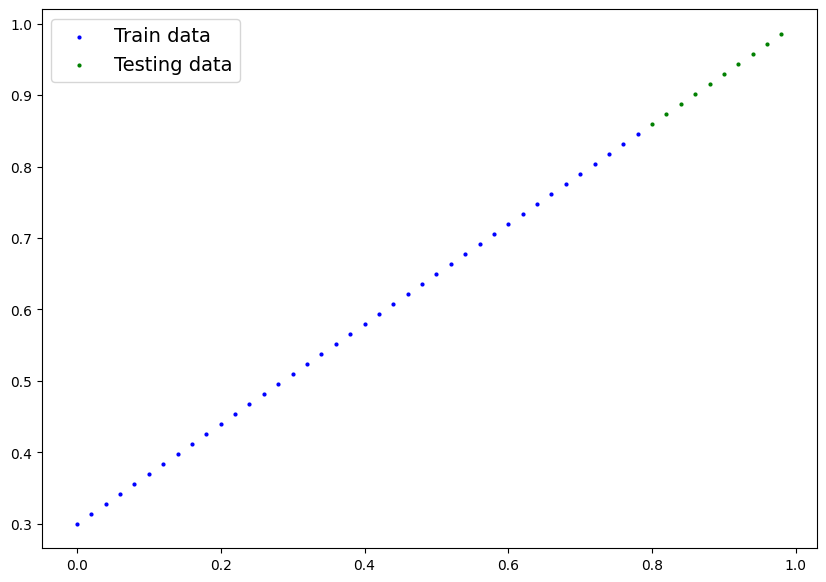

In [6]:
plot_predictions();

In [7]:
#Model

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,requires_grad = True, dtype = torch.float))
        self.bias = nn.Parameter(torch.randn(1,requires_grad = True, dtype = torch.float))
    def forward(self,x):
        return self.weights * x + self.bias
    
    

In [8]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
#Make predictions with model

with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds    
    

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

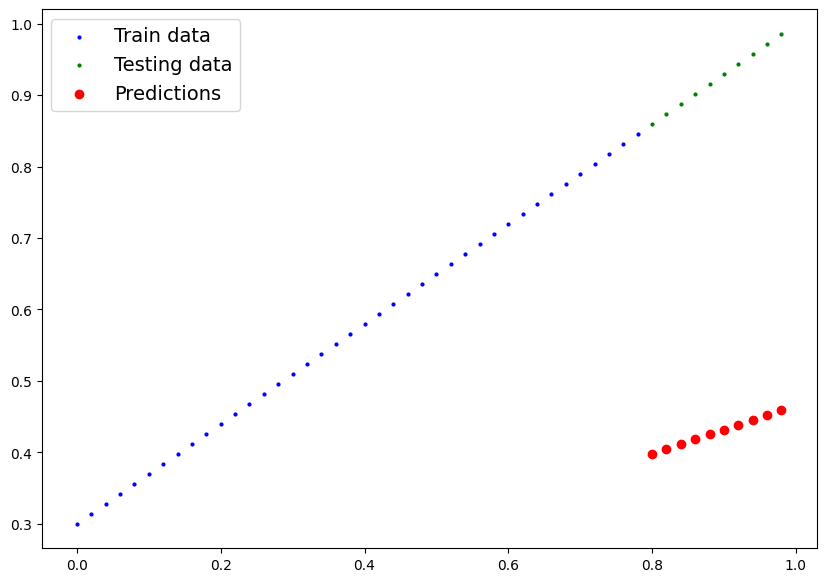

In [10]:
plot_predictions(predictions=y_preds);

In [11]:
#setup loss function

loss_fn = nn.L1Loss()

In [12]:
#optimizer

optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)

In [13]:
epochs = 10

# 0. loop through the data
for epoch in range(epochs):
    # set the model to training mode
    model_0.train()
    #forward pass
    y_pred = model_0(X_train)
    loss = loss_fn(y_pred,Y_train)
    
    # optimizer zero grad
    optimizer.zero_grad()
    # backpropagation
    loss.backward()
    #step the optim
    optimizer.step()
    model_0.eval()
    with torch.inference_mode():
        y_preds_new = model_0(X_test)
        test_loss = loss_fn(y_preds_new, Y_test)
    print(f"Train Loss:{loss} Test Loss:{test_loss} Epoch:{epoch+1}")
    



Train Loss:0.31288138031959534 Test Loss:0.48106518387794495 Epoch:1
Train Loss:0.3013603389263153 Test Loss:0.4675942063331604 Epoch:2
Train Loss:0.28983935713768005 Test Loss:0.4541231691837311 Epoch:3
Train Loss:0.2783183455467224 Test Loss:0.44065219163894653 Epoch:4
Train Loss:0.26679736375808716 Test Loss:0.4271811842918396 Epoch:5
Train Loss:0.2552763521671295 Test Loss:0.41371020674705505 Epoch:6
Train Loss:0.24375534057617188 Test Loss:0.40023916959762573 Epoch:7
Train Loss:0.23223432898521423 Test Loss:0.3867681920528412 Epoch:8
Train Loss:0.22071333229541779 Test Loss:0.37329721450805664 Epoch:9
Train Loss:0.20919232070446014 Test Loss:0.3598262071609497 Epoch:10


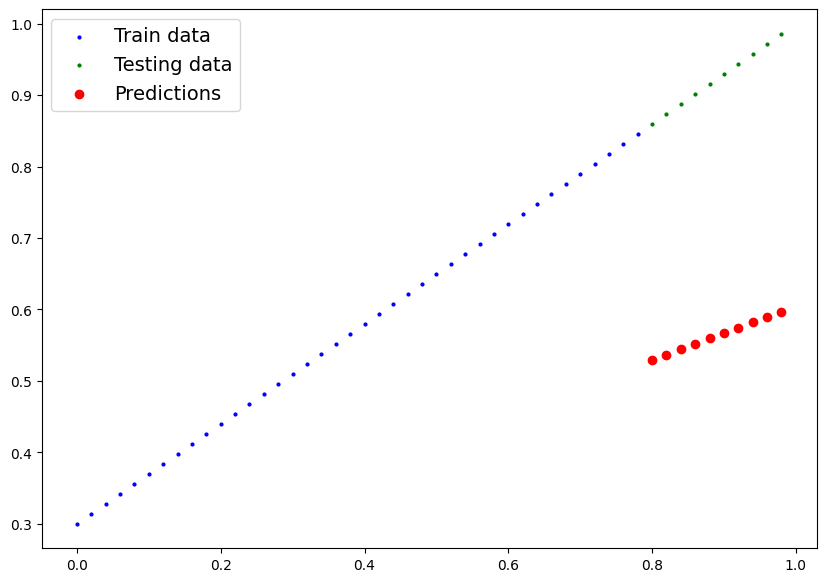

In [14]:

plot_predictions(predictions=y_preds_new);    